In [9]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

import sys

if ".." not in sys.path:
    sys.path.append("..")

from utils.stats import print_variable_info
from utils.const import VARIABLE_COLORS

## Lectura de Datos

In [10]:
df_norte2 = pd.read_csv(
    "../../datos/01_complete_datasets/NORTE2_2020_2023.csv", parse_dates=["date"]
)
df_norte2.head()

,date,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RAINF,RH,SO2,SR,TOUT,WSR,WDR
0,2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,69.0,62.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1,2020-01-01 01:00:00,0.60,0.5,NaN,NaN,NaN,49.0,NaN,715.6,0.00,92.0,18.6,0.0,11.20,6.3,30.0
2,2020-01-01 02:00:00,0.36,0.5,NaN,NaN,NaN,53.0,NaN,714.6,0.00,92.0,18.9,0.0,11.21,2.6,128.0
3,2020-01-01 03:00:00,0.44,0.5,NaN,NaN,NaN,51.0,38.0,714.2,0.00,92.0,19.1,0.0,11.36,2.6,79.0
4,2020-01-01 04:00:00,0.35,0.5,NaN,NaN,NaN,50.0,NaN,713.8,0.01,92.0,19.1,0.0,11.34,2.3,85.0


In [11]:
df_centro = pd.read_csv(
    "../../datos/01_complete_datasets/CENTRO_2020_2023.csv", parse_dates=["date"]
)
df_centro.head()

,date,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RAINF,RH,SO2,SR,TOUT,WSR,WDR
0,2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,86.34,60.91,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN
1,2020-01-01 01:00:00,NaN,NaN,6.5,9.8,19.0,112.01,85.64,713.6,0.0,91.0,NaN,0.158,10.49,3.7,2.0
2,2020-01-01 02:00:00,NaN,NaN,5.6,8.8,18.0,100.01,72.39,712.8,0.0,91.0,NaN,0.156,10.51,1.9,144.0
3,2020-01-01 03:00:00,3.22,3.2,7.2,10.4,14.0,106.20,70.25,712.4,0.0,92.0,2.9,0.158,10.64,2.7,28.0
4,2020-01-01 04:00:00,3.26,4.7,10.6,15.3,5.0,141.86,93.72,712.0,0.0,92.0,3.3,0.163,10.73,2.0,31.0


In [12]:
df_sureste3 = pd.read_csv(
    "../../datos/01_complete_datasets/SURESTE3_2020_2023.csv", parse_dates=["date"]
)
df_sureste3.head()

,date,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RAINF,RH,SO2,SR,TOUT,WSR,WDR
0,2020-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,37.0,18.0,NaN,NaN,NaN,NaN,0.000,NaN,NaN,NaN
1,2020-01-01 01:00:00,1.88,2.0,5.2,7.2,25.0,37.0,28.0,734.2,0.01,93.0,NaN,0.037,11.68,1.7,98.0
2,2020-01-01 02:00:00,1.86,2.6,5.0,7.6,22.0,55.0,28.0,733.8,0.02,93.0,NaN,0.037,11.68,1.6,133.0
3,2020-01-01 03:00:00,1.78,3.1,5.9,8.9,21.0,35.0,11.0,733.0,0.00,93.0,NaN,0.037,11.70,1.5,198.0
4,2020-01-01 04:00:00,1.76,2.0,4.5,6.5,22.0,27.0,NaN,732.8,0.02,93.0,NaN,0.037,11.80,0.7,240.0


In [13]:
zones_df: dict = {
    "NORTE2": df_norte2,
    "SURESTE3": df_sureste3,
    "CENTRO": df_centro,
}

## A. Dimensión del dataset
**Indica cantidad de registros y columnas**

In [14]:
# df_norte2_2021_2023 = pd.read_csv("../processed_datasets/NORTE2_2021_2023.csv")
# df_centro_2021_2023 = pd.read_csv("../processed_datasets/CENTRO_2021_2023.csv")
# df_sureste3_2021_2023 = pd.read_csv("../processed_datasets/SURESTE3_2021_2023.csv")

# processed_zone_df: dict = {
#     "NORTE2": df_norte2_2021_2023,
#     "SURESTE3": df_sureste3_2021_2023,
#     "CENTRO": df_centro_2021_2023,
# }

In [15]:
for zone, df in zones_df.items():
    print(f"Zona: {zone}")
    print(f"Cantidad de registros: {df.shape[0]}")
    print(f"Cantidad de columnas/variables: {df.shape[1]}\n")

Zona: NORTE2
Cantidad de registros: 31790
Cantidad de columnas/variables: 16

Zona: SURESTE3
Cantidad de registros: 31790
Cantidad de columnas/variables: 16

Zona: CENTRO
Cantidad de registros: 31791
Cantidad de columnas/variables: 16



## B. Describe claramente cada una de las variables
**Incluyendo su nombre, descripción, tipo (categórico/Numérico) y valores posibles que puede tomar, valores nulos.**

In [29]:
interest_vars = [
    "date",
    "PM10",
    "PM2.5",
    "RH",
    "WDR",
    "SO2",
    "NO2"
]


for zone, df in zones_df.items():
    print(f"Zona: {zone}")
    print_variable_info(df, variables=interest_vars)
    print("################")

Zona: NORTE2
Variable: date
Tipo de Variable: Numérico
Valores Posbles: [2020-01-01 00:00:00, 2023-08-17 23:00:00]
Cantidad de Valores Nulos: 0/31790 -> 0.00%
-----

Variable: PM10
Tipo de Variable: Numérico
Valores Posbles: [2.0, 767.0]
Cantidad de Valores Nulos: 1363/31790 -> 4.29%
-----

Variable: PM2.5
Tipo de Variable: Numérico
Valores Posbles: [1.0, 370.0]
Cantidad de Valores Nulos: 5484/31790 -> 17.25%
-----

Variable: RH
Tipo de Variable: Numérico
Valores Posbles: [1.0, 93.0]
Cantidad de Valores Nulos: 417/31790 -> 1.31%
-----

Variable: WDR
Tipo de Variable: Numérico
Valores Posbles: [1.0, 360.0]
Cantidad de Valores Nulos: 383/31790 -> 1.20%
-----

Variable: SO2
Tipo de Variable: Numérico
Valores Posbles: [0.5, 175.4]
Cantidad de Valores Nulos: 12471/31790 -> 39.23%
-----

Variable: NO2
Tipo de Variable: Numérico
Valores Posbles: [0.4, 188.6]
Cantidad de Valores Nulos: 9079/31790 -> 28.56%
-----

################
Zona: SURESTE3
Variable: date
Tipo de Variable: Numérico
Valores

In [17]:
total_df = pd.concat(list(zones_df.values()))
print_variable_info(total_df, variables=interest_vars)

Variable: date
Tipo de Variable: Numérico
Valores Posbles: [2020-01-01 00:00:00, 2023-08-17 23:00:00]
Cantidad de Valores Nulos: 0/95371 -> 0.00%
-----

Variable: PM10
Tipo de Variable: Numérico
Valores Posbles: [2.0, 767.0]
Cantidad de Valores Nulos: 3889/95371 -> 4.08%
-----

Variable: PM2.5
Tipo de Variable: Numérico
Valores Posbles: [0.0, 370.0]
Cantidad de Valores Nulos: 13106/95371 -> 13.74%
-----

Variable: WSR
Tipo de Variable: Numérico
Valores Posbles: [0.1, 42.0]
Cantidad de Valores Nulos: 1861/95371 -> 1.95%
-----

Variable: WDR
Tipo de Variable: Numérico
Valores Posbles: [1.0, 360.0]
Cantidad de Valores Nulos: 1895/95371 -> 1.99%
-----



## C. Verifica la calidad de los datos
**Valores faltantes, valores de los datos, valores espurios o erróneos**

In [18]:
date_range = (
    pd.date_range("01/01/2020  12:00:00 a. m.", "17/08/2023  11:00:00 p. m.", freq="h")
    .to_series()
    .reset_index(drop=True)
)

for zone, df in zones_df.items():
    missing_data = date_range.loc[~date_range.isin(df["date"])].astype(str).tolist()
    print_missing_data = "\n".join(missing_data)
    print(f"{zone.ljust(30, '_')}")
    print(f"Cantidad de tiempos faltantes: {len(missing_data)}\n")
    print(f"Tiempos faltantes:\n\n{print_missing_data}\n")

NORTE2________________________
Cantidad de tiempos faltantes: 10

Tiempos faltantes:

2020-01-28 11:00:00
2020-01-28 18:00:00
2020-04-11 06:00:00
2020-05-27 20:00:00
2020-06-08 14:00:00
2020-06-24 18:00:00
2020-06-30 13:00:00
2020-12-20 06:00:00
2021-04-19 09:00:00
2023-02-11 19:00:00

SURESTE3______________________
Cantidad de tiempos faltantes: 10

Tiempos faltantes:

2020-01-28 11:00:00
2020-01-28 18:00:00
2020-04-11 06:00:00
2020-05-27 20:00:00
2020-06-08 14:00:00
2020-06-24 18:00:00
2020-06-30 13:00:00
2020-12-20 06:00:00
2021-04-19 09:00:00
2023-02-11 19:00:00

CENTRO________________________
Cantidad de tiempos faltantes: 9

Tiempos faltantes:

2020-01-28 11:00:00
2020-01-28 18:00:00
2020-04-11 06:00:00
2020-05-27 20:00:00
2020-06-08 14:00:00
2020-06-24 18:00:00
2020-12-20 06:00:00
2021-04-19 09:00:00
2023-02-11 19:00:00



## Boxplot

In [19]:
def box_plot(
    df: pd.DataFrame,
    interest_vars: list[str],
    title: str,
):
    fig, axes = plt.subplots(
        nrows=len(interest_vars) - 1,
        ncols=1,
        figsize=(14, 24),
        sharex=False,
    )

    for i, variable in enumerate(df[interest_vars].drop("date", axis=1)):
        sns.boxplot(
            x=variable,
            data=df,
            ax=axes[i],
            orient="horizontal",
            color=VARIABLE_COLORS.get(variable, "pink"),
        )
        if i == 0:
            axes[i].set_title(title)

        axes[i].set_ylabel(variable)
        axes[i].set_xlabel("")

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()

c:\Users\Franco Mendoza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Franco Mendoza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Franco Mendoza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Franco Mendoza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureW

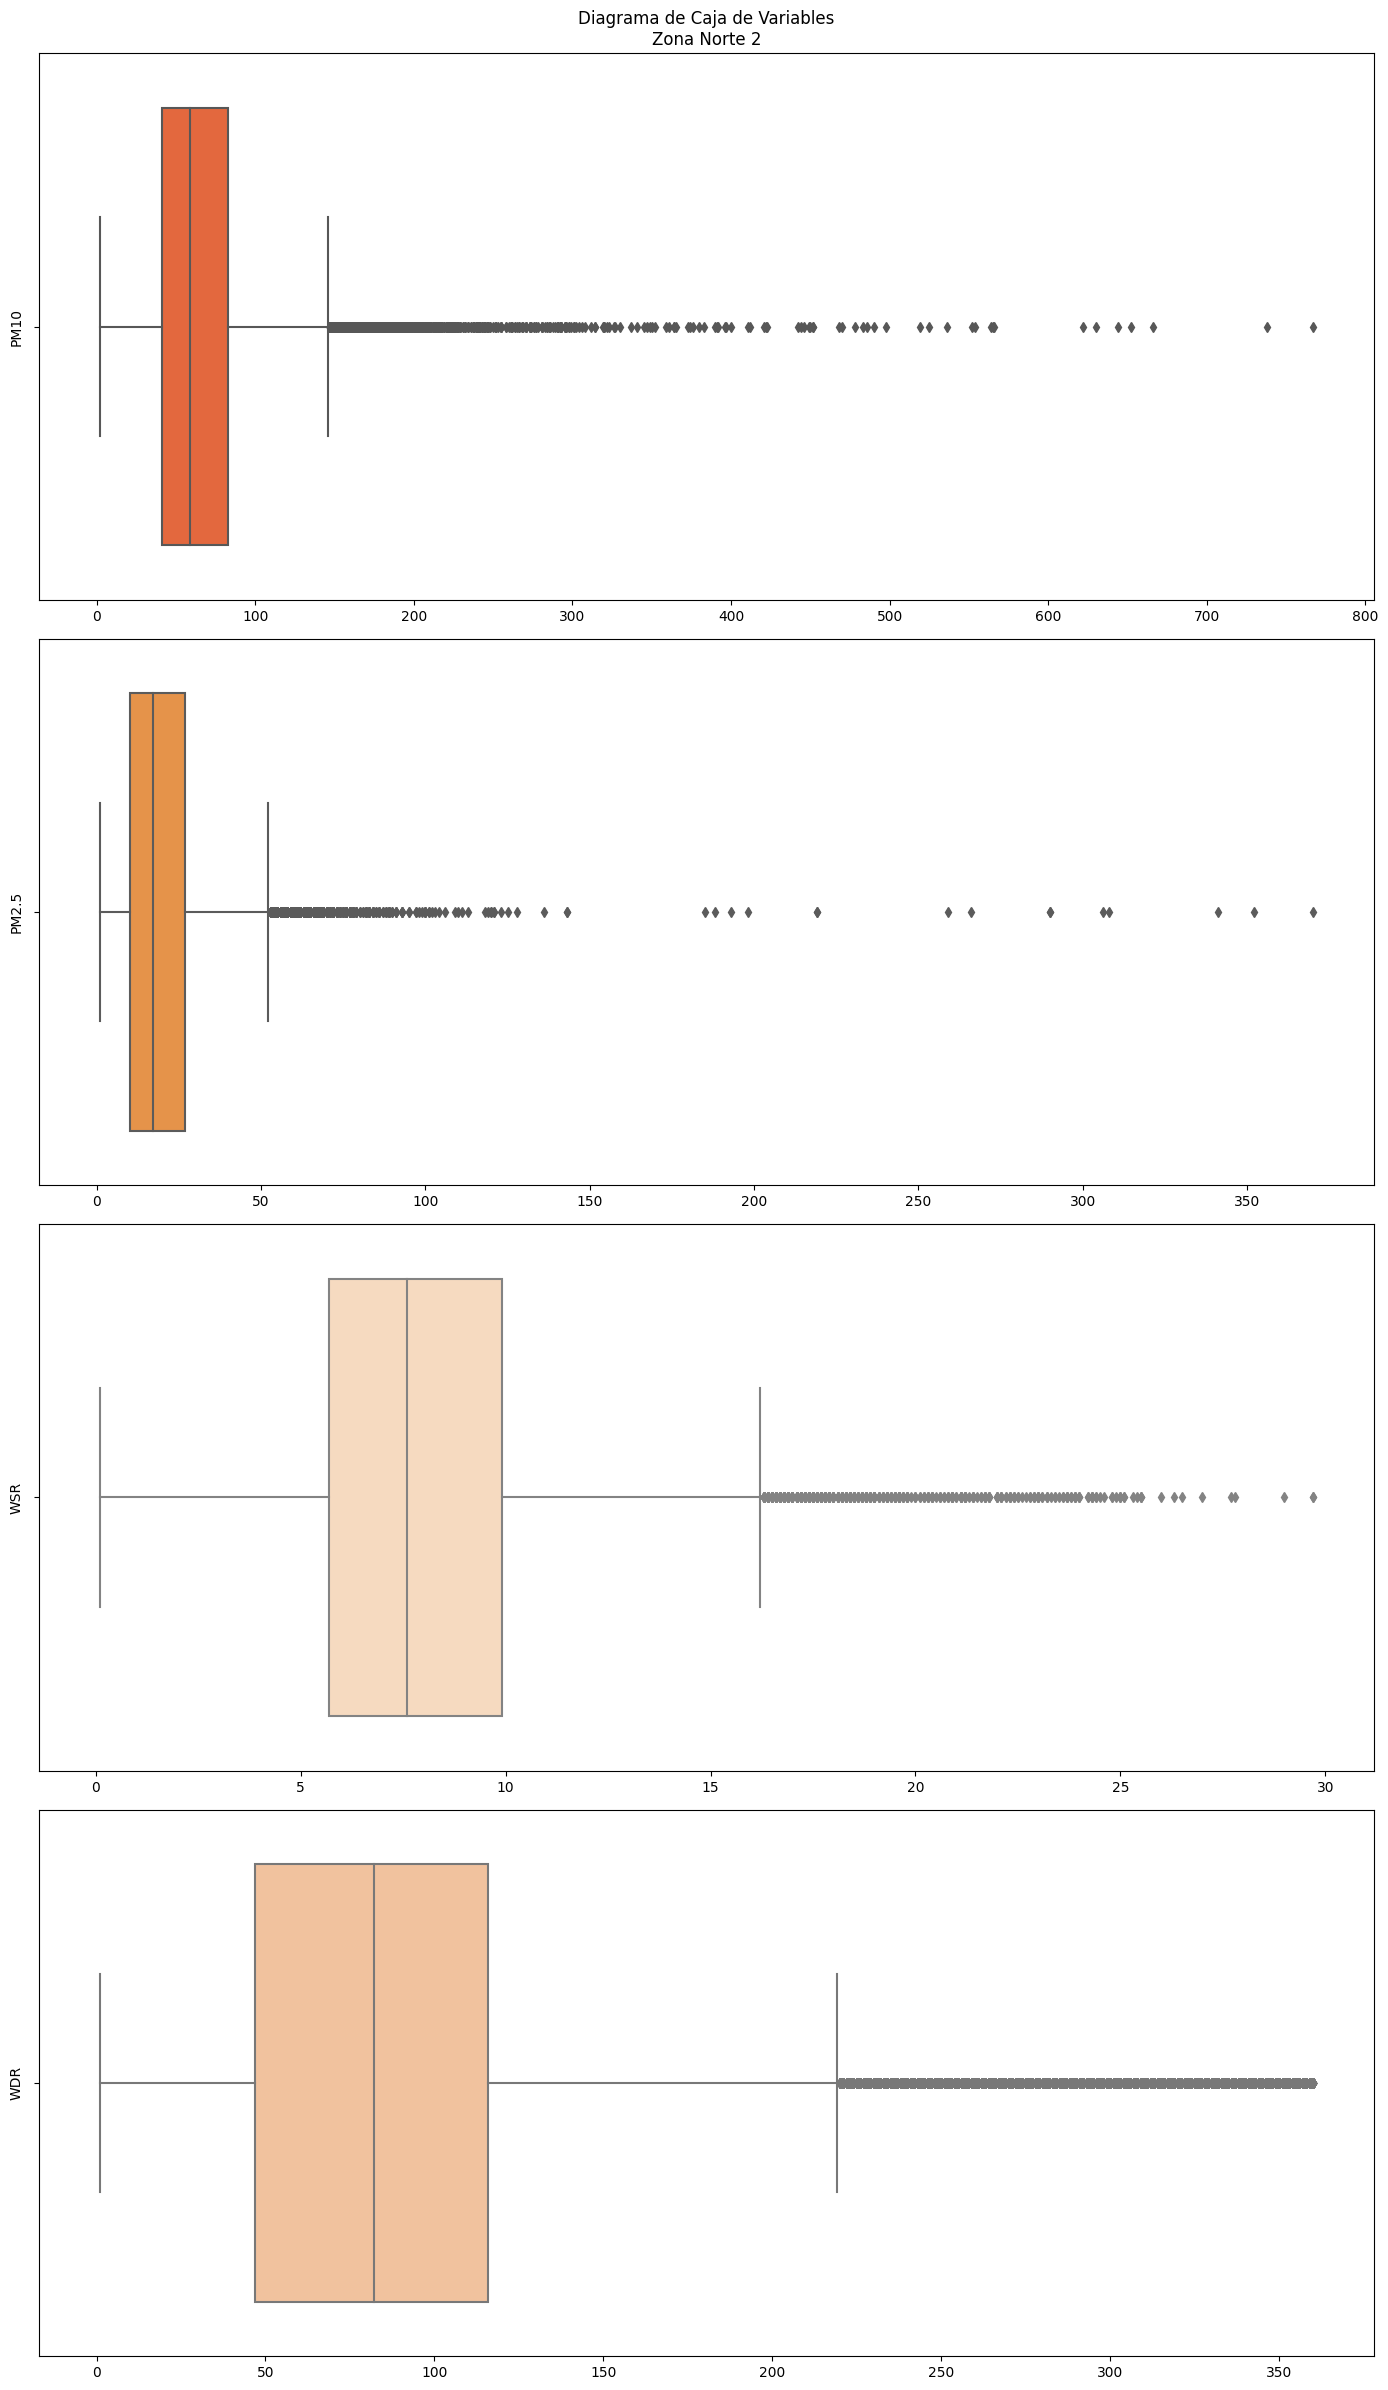

In [20]:
box_plot(
    df_norte2,
    interest_vars=interest_vars,
    title="Diagrama de Caja de Variables\nZona Norte 2",
)

c:\Users\Franco Mendoza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Franco Mendoza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Franco Mendoza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Franco Mendoza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureW

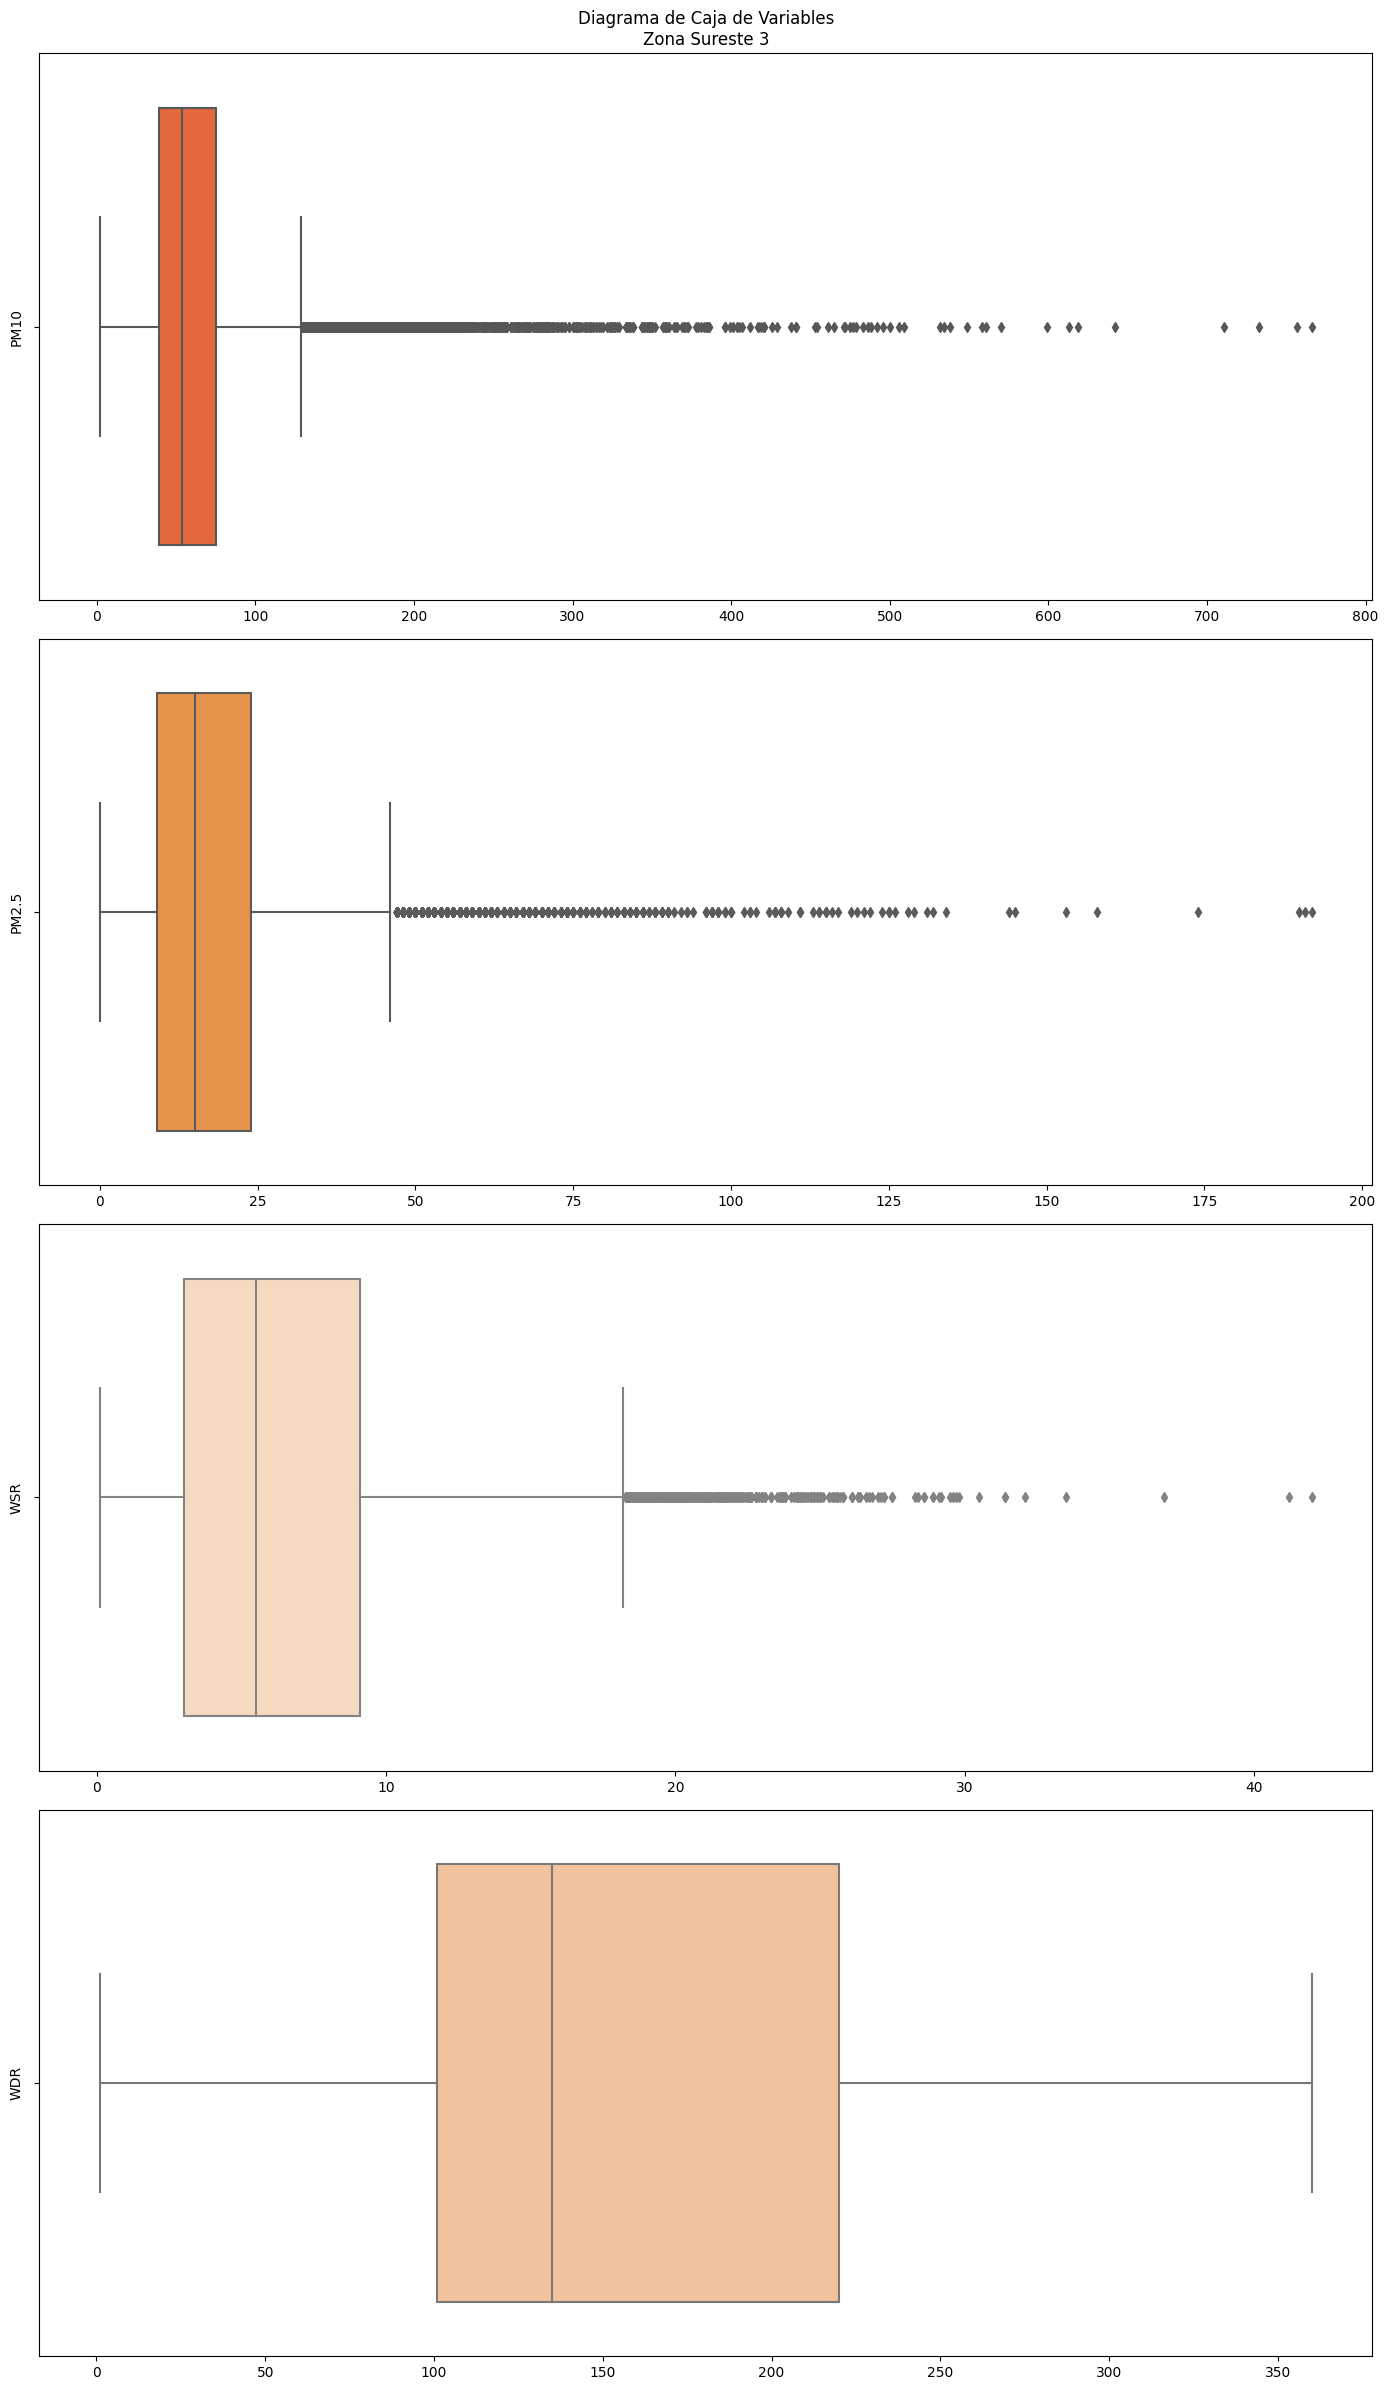

In [21]:
box_plot(
    df_sureste3,
    interest_vars=interest_vars,
    title="Diagrama de Caja de Variables\nZona Sureste 3",
)

c:\Users\Franco Mendoza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Franco Mendoza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Franco Mendoza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Franco Mendoza\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureW

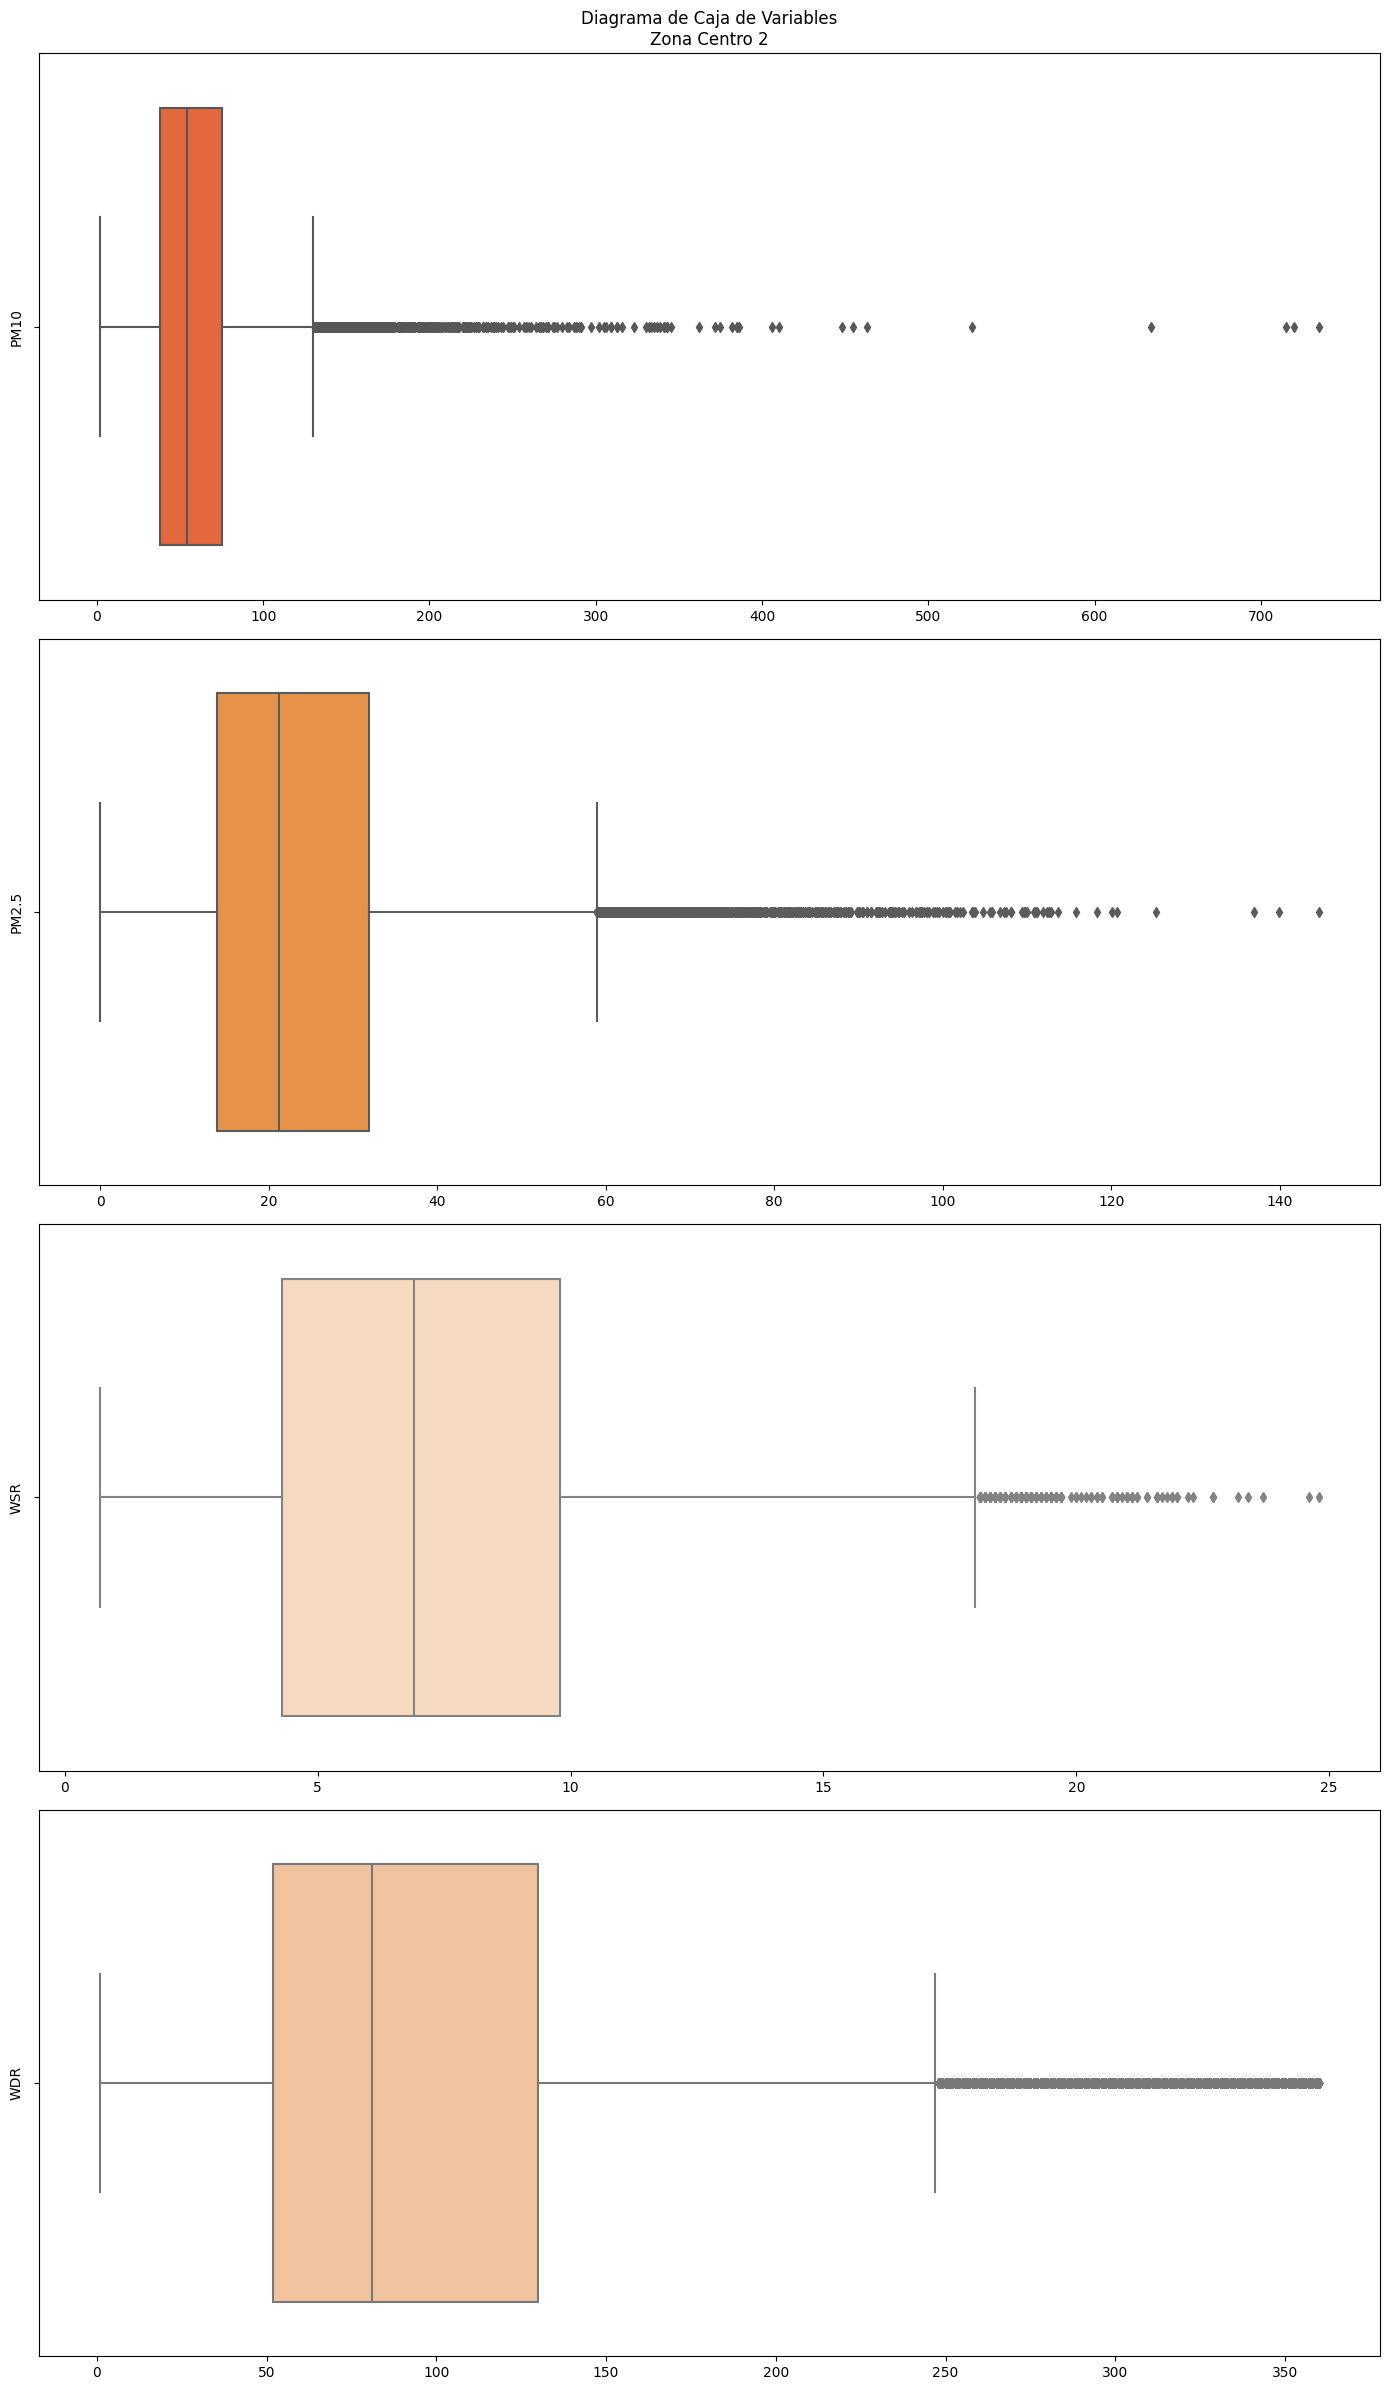

In [22]:
box_plot(
    df_centro,
    interest_vars=interest_vars,
    title="Diagrama de Caja de Variables\nZona Centro 2",
)

## Series de Tiempo

In [23]:
from typing import Literal


def plot_series(
    df: pd.DataFrame,
    title: str,
    interest_vars: list[str],
    freq: Literal["D", "W", "M"],
):
    df_daily = df.set_index("date").groupby(pd.Grouper(freq=freq)).mean()

    for variable in interest_vars[1:]:
        df_daily[variable].plot(
            linewidth=3,
            figsize=(16, 8),
            legend=True,
            color=VARIABLE_COLORS.get(variable, "pink"),
            title=title,
            xlabel="Fecha",
        )

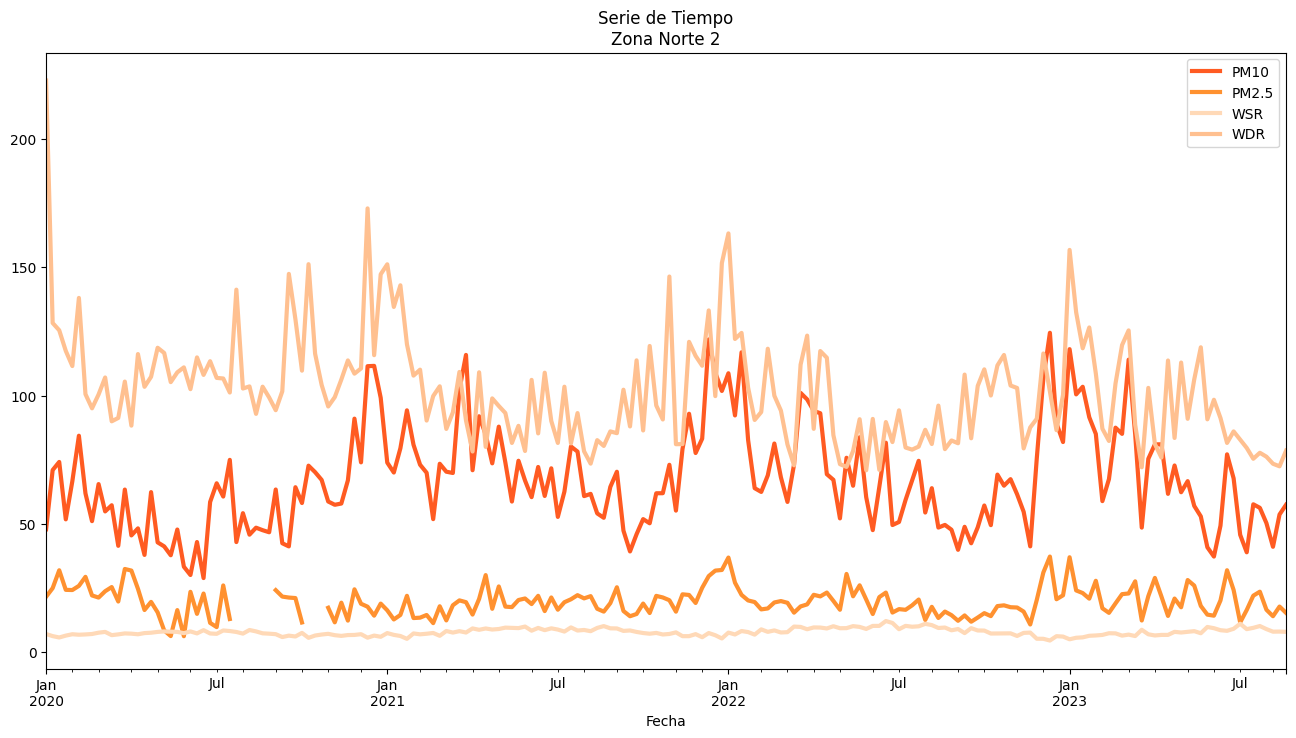

In [24]:
plot_series(
    df_norte2,
    title="Serie de Tiempo\nZona Norte 2",
    interest_vars=interest_vars,
    freq="W",
)

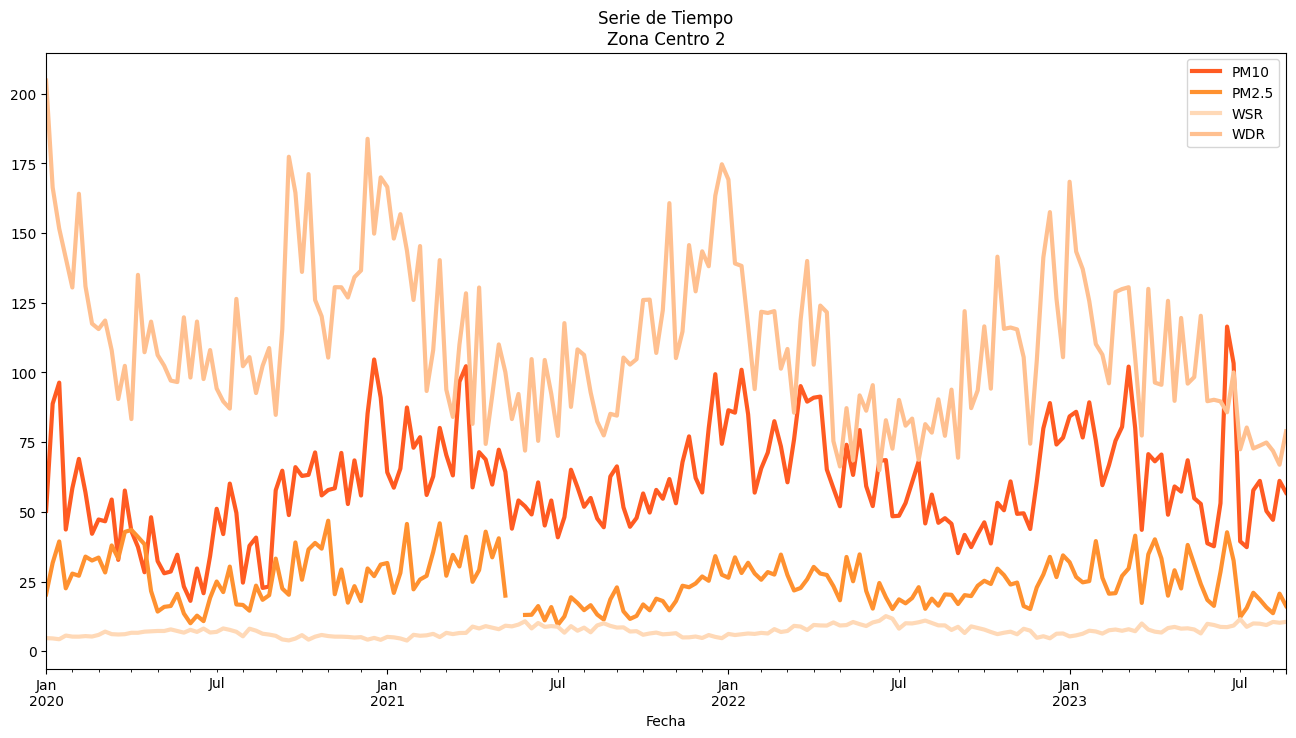

In [25]:
plot_series(
    df_centro,
    title="Serie de Tiempo\nZona Centro 2",
    interest_vars=interest_vars,
    freq="W",
)

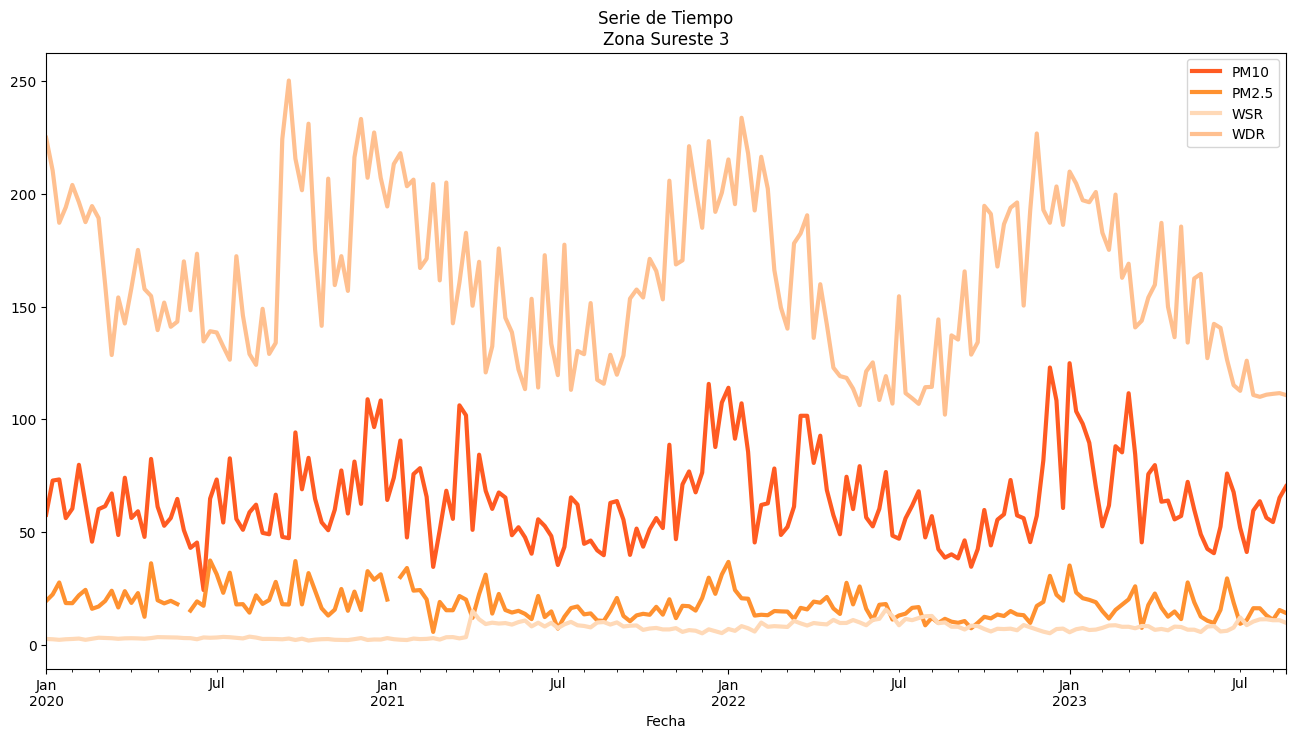

In [26]:
plot_series(
    df_sureste3,
    title="Serie de Tiempo\nZona Sureste 3",
    interest_vars=interest_vars,
    freq="W",
)

In [46]:
# Histograma PM2.5 de todas las zonas

fig = px.histogram(
    total_df,
    x="PM2.5",
    marginal="box",
    nbins=100,
    title="Histograma de PM2.5\nTodas las Zonas",
    color_discrete_sequence=["#5DBB63"],
)
fig.show()